Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Loading Data

In [7]:
data = pd.read_csv(r"C:\\Users\\JAMES TECH\\Documents\\credit-scoring-mlops\\data\\loan_applicant_data.csv")

In [8]:
# Viewing head
data.head()

,CustomerID,LoanID,ApplicantType,Age,EmploymentType,AnnualIncome,MonthlyIncome,LoanType,LoanAmount,LoanTenureMonths,InterestRate,CollateralValue,CreditScore,PastDefaults,NumOpenAccounts,BusinessRevenue,ProfitMargin,BusinessYears,ProbDefault
0,CUST100001,LN200001,Personal,26,Self-employed,709537,59128,Medical,161834,60,11.35,1096384,761,0,0,NaN,NaN,NaN,0.000
1,CUST100002,LN200002,Personal,23,Salaried,507897,42325,Debt Consolidation,600693,24,11.33,687474,688,0,0,NaN,NaN,NaN,0.126
2,CUST100003,LN200003,Personal,57,Salaried,702606,58550,Personal,530371,36,11.30,283442,662,0,1,NaN,NaN,NaN,0.092
3,CUST100004,LN200004,Personal,42,Self-employed,964999,80417,Medical,733422,48,11.39,1319091,788,0,1,NaN,NaN,NaN,0.012
4,CUST100006,LN200006,Business,45,Salaried,1599151,133263,Working Capital,374467,48,17.84,7238008,673,0,2,4092479.0,21.73,12.0,0.000


In [9]:
# Dataset info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5397 non-null   object 
 1   LoanID            5397 non-null   object 
 2   ApplicantType     5397 non-null   object 
 3   Age               5397 non-null   int64  
 4   EmploymentType    5397 non-null   object 
 5   AnnualIncome      5397 non-null   int64  
 6   MonthlyIncome     5397 non-null   int64  
 7   LoanType          5397 non-null   object 
 8   LoanAmount        5397 non-null   int64  
 9   LoanTenureMonths  5397 non-null   int64  
 10  InterestRate      5397 non-null   float64
 11  CollateralValue   5397 non-null   int64  
 12  CreditScore       5397 non-null   int64  
 13  PastDefaults      5397 non-null   int64  
 14  NumOpenAccounts   5397 non-null   int64  
 15  BusinessRevenue   1941 non-null   float64
 16  ProfitMargin      1941 non-null   float64


Data Cleaning

* Missing values

In [10]:
missing = data.isnull().mean().sort_values(ascending=False)
missing[missing > 0]

BusinessYears      0.640356
ProfitMargin       0.640356
BusinessRevenue    0.640356
dtype: float64

This is structural missingness (only Business applicants have these)

* Duplicates check

In [11]:
data.duplicated().sum()

0

No duplicate values found

Categorical Variables

* Identfying categorical variables

In [13]:
cat_cols = data.select_dtypes(include="object").columns
cat_cols

Index(['CustomerID', 'LoanID', 'ApplicantType', 'EmploymentType', 'LoanType'], dtype='object')

In [14]:
# Excluding IDs from analysis

cat_cols = ["ApplicantType", "EmploymentType", "LoanType"]

###### Eda

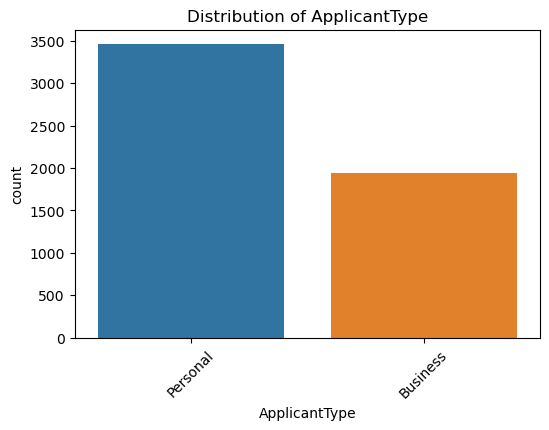

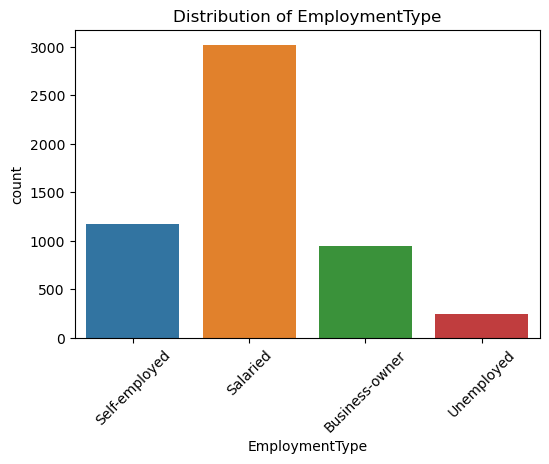

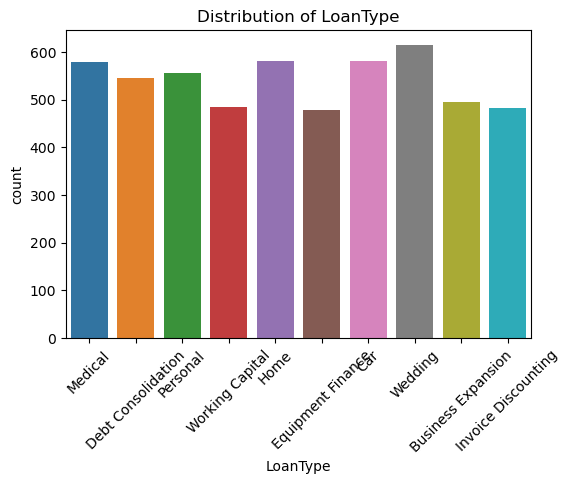

In [15]:
# Count plot

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

Target distribution

C:\Users\JAMES TECH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


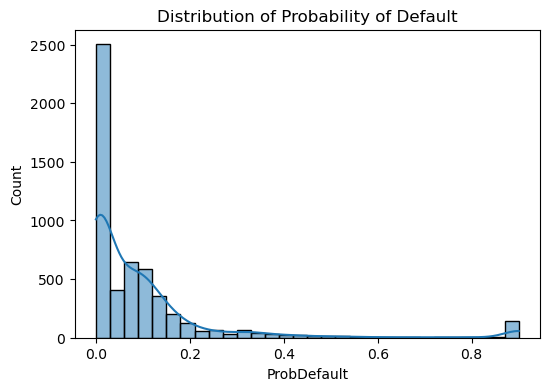

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(data["ProbDefault"], bins=30, kde=True)
plt.title("Distribution of Probability of Default")
plt.show()

Default risk by default

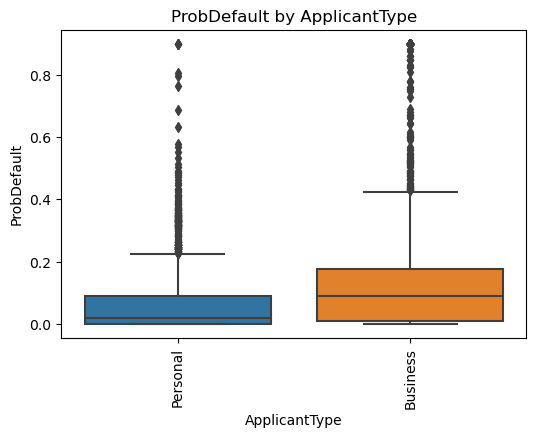

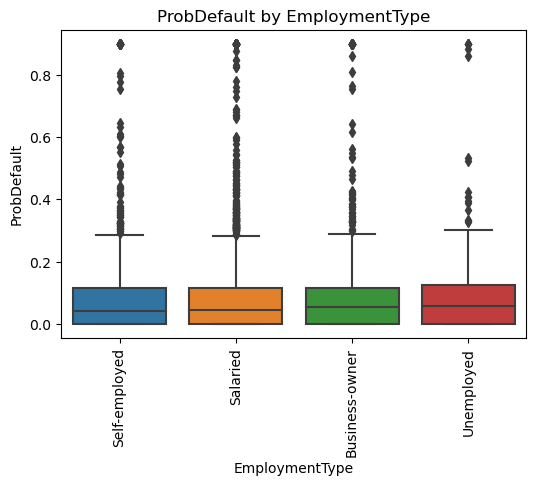

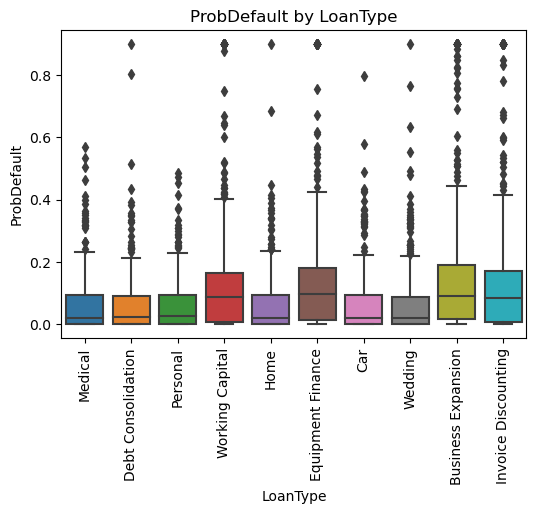

In [18]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data, x=col, y="ProbDefault")
    plt.title(f"ProbDefault by {col}")
    plt.xticks(rotation=90)
    plt.show()

Numerical Variables

In [19]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns
num_cols = num_cols.drop("ProbDefault")
num_cols

Index(['Age', 'AnnualIncome', 'MonthlyIncome', 'LoanAmount',
       'LoanTenureMonths', 'InterestRate', 'CollateralValue', 'CreditScore',
       'PastDefaults', 'NumOpenAccounts', 'BusinessRevenue', 'ProfitMargin',
       'BusinessYears'],
      dtype='object')

Summary Statistics

In [20]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5397.0,4.455420e+01,1.294694e+01,21.00,34.00,45.00,56.00,69.00
AnnualIncome,5397.0,1.701876e+06,2.036170e+06,80000.00,490667.00,737361.00,2254281.00,11974297.00
MonthlyIncome,5397.0,1.418230e+05,1.696809e+05,6667.00,40889.00,61447.00,187857.00,997858.00
LoanAmount,5397.0,1.772250e+06,2.662178e+06,20000.00,253669.00,449155.00,2303916.00,15660610.00
LoanTenureMonths,5397.0,4.998110e+01,2.181811e+01,12.00,36.00,48.00,60.00,120.00
InterestRate,5397.0,1.175156e+01,2.715004e+00,7.00,9.83,11.42,13.30,23.52
CollateralValue,5397.0,2.192919e+06,3.199936e+06,0.00,287232.00,700989.00,2827745.00,18340336.00
CreditScore,5397.0,6.833226e+02,7.071650e+01,375.00,638.00,686.00,732.00,900.00
PastDefaults,5397.0,2.160460e-01,6.039299e-01,0.00,0.00,0.00,0.00,3.00
NumOpenAccounts,5397.0,1.986289e+00,1.422770e+00,0.00,1.00,2.00,3.00,9.00


Distribution

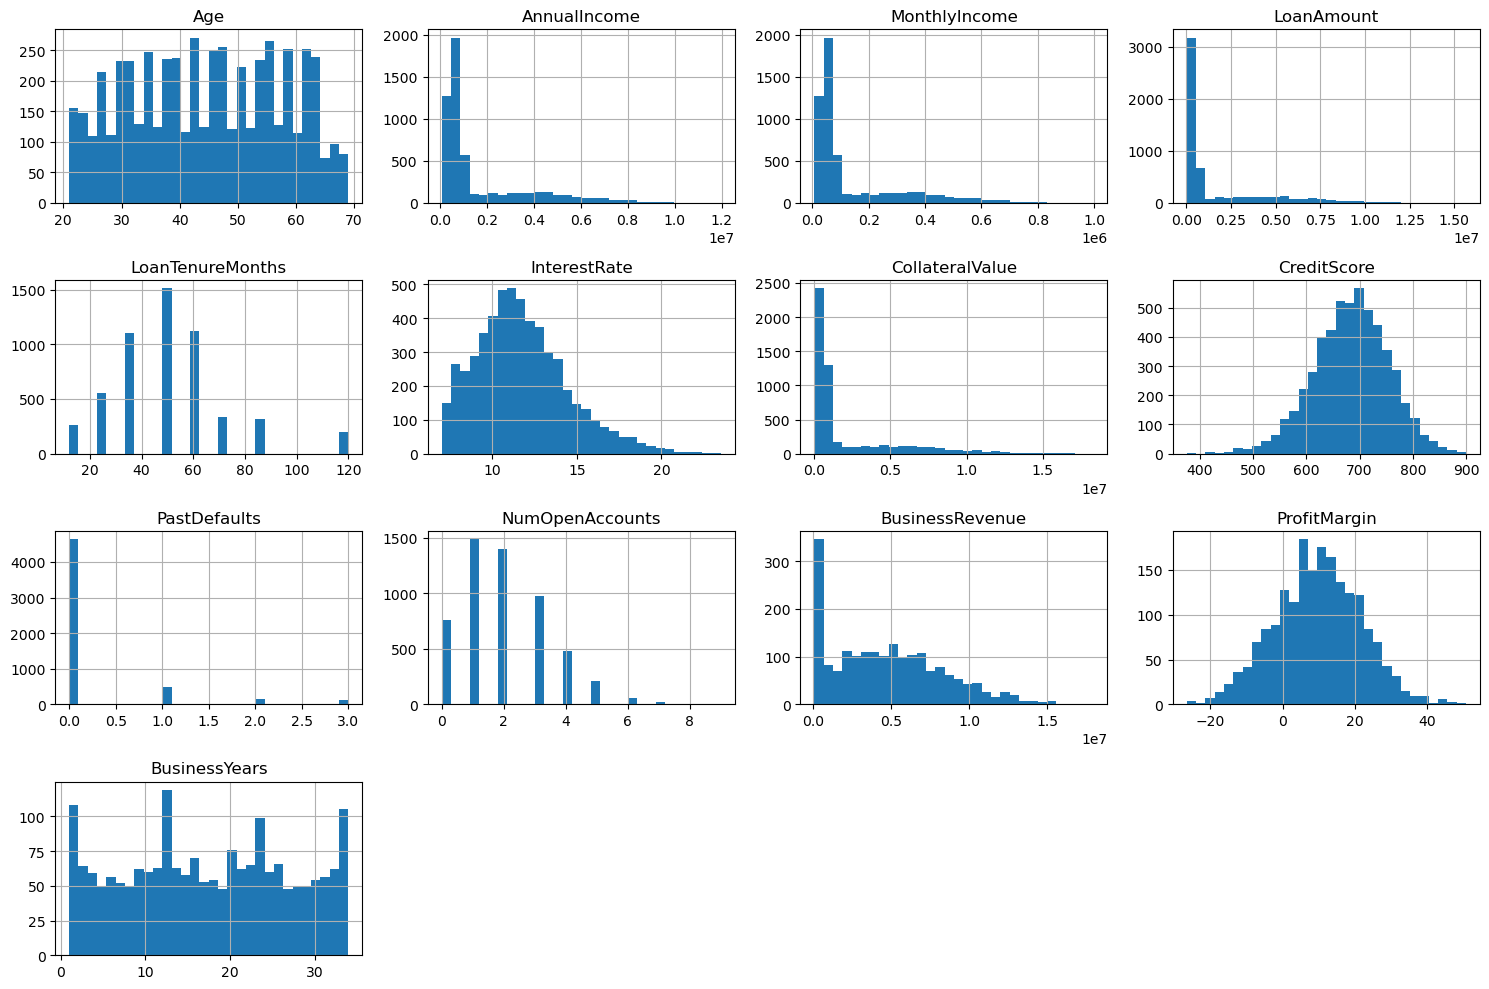

In [21]:
data[num_cols].hist(figsize=(15,10), bins=30)
plt.tight_layout()
plt.show()

Outlier Analysis

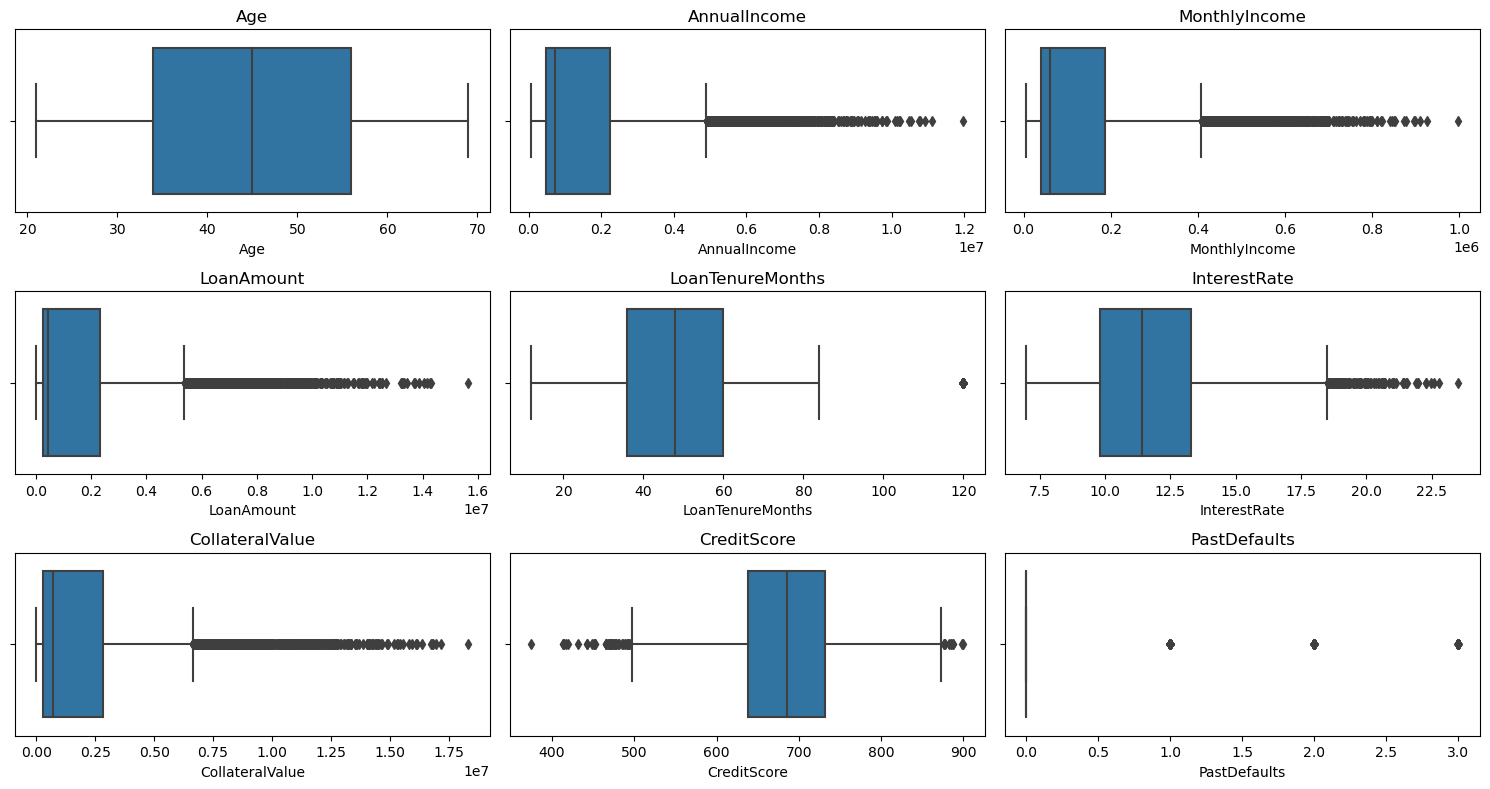

In [22]:
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols[:9], 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Correlational Analysis

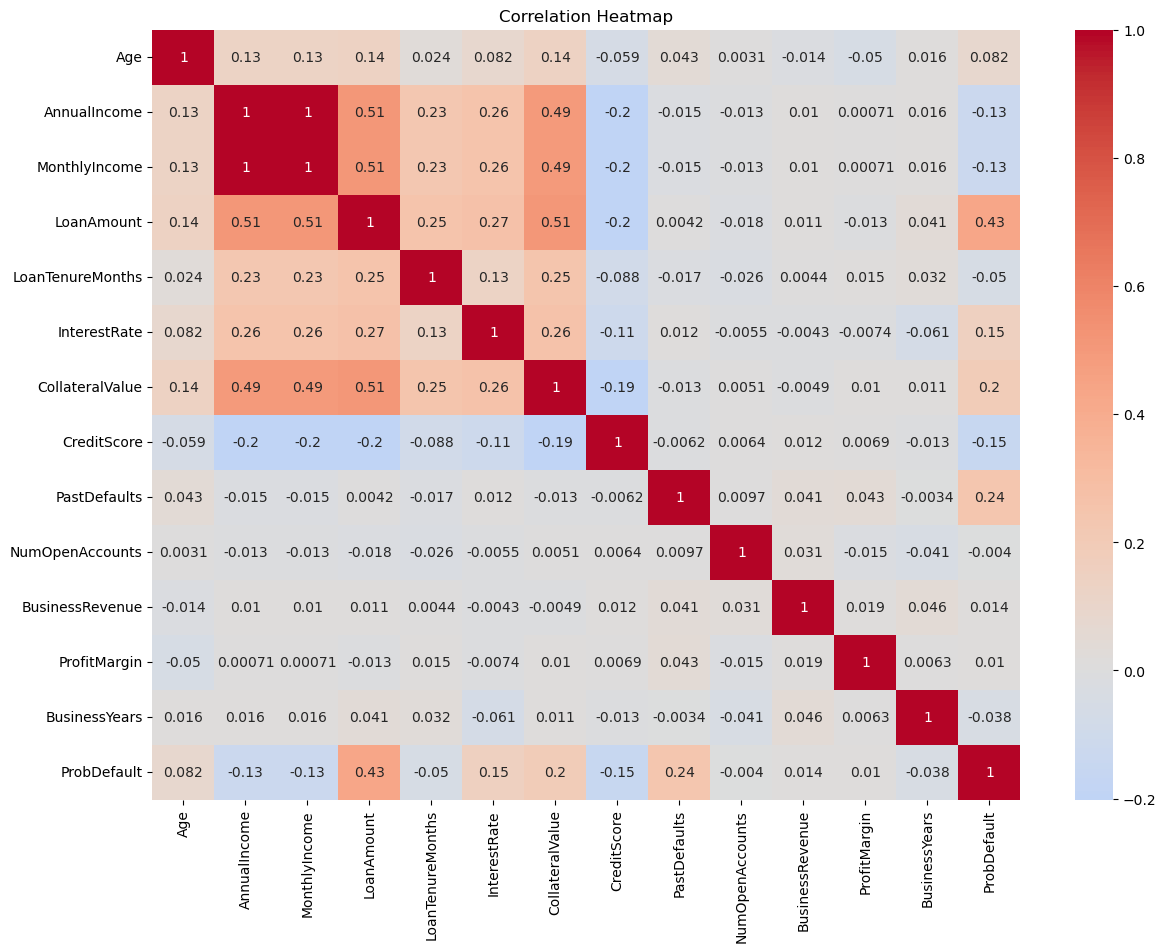

In [24]:
plt.figure(figsize=(14,10))
corr = data[num_cols.tolist() + ["ProbDefault"]].corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot = True)
plt.title("Correlation Heatmap")
plt.show()

Business vs Personal Applicants

In [25]:
data["ApplicantType"].value_counts()

ApplicantType
Personal    3456
Business    1941
Name: count, dtype: int64

Default Risk

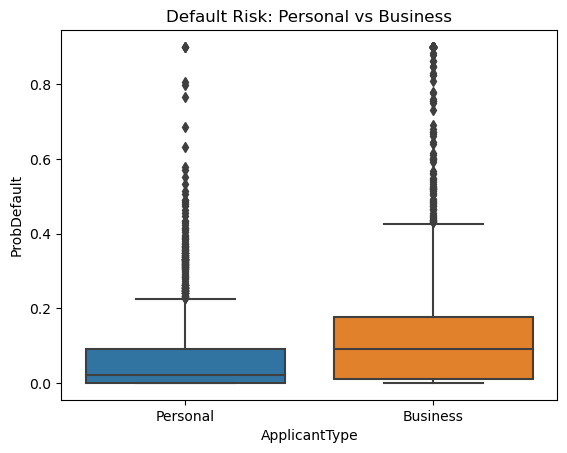

In [26]:
sns.boxplot(data=data, x="ApplicantType", y="ProbDefault")
plt.title("Default Risk: Personal vs Business")
plt.show()

Business only features

In [27]:
business_data = data[data["ApplicantType"] == "Business"]

business_data[["BusinessRevenue", "ProfitMargin", "BusinessYears"]].describe()

,BusinessRevenue,ProfitMargin,BusinessYears
count,1.941000e+03,1941.000000,1941.000000
mean,4.757952e+06,9.788825,17.376095
std,3.628805e+06,11.958858,9.661472
min,5.000000e+04,-26.420000,1.000000
25%,1.757456e+06,1.690000,9.000000
50%,4.458241e+06,9.860000,17.000000
75%,7.162536e+06,18.050000,26.000000
max,1.798115e+07,50.650000,34.000000


Feature Target Relationship

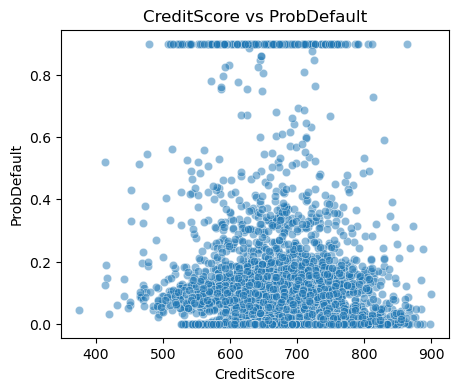

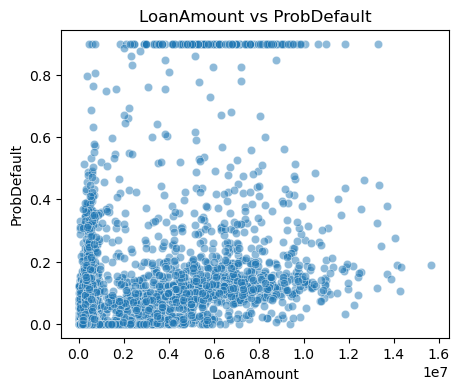

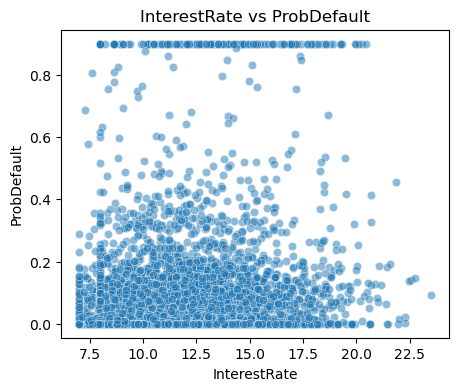

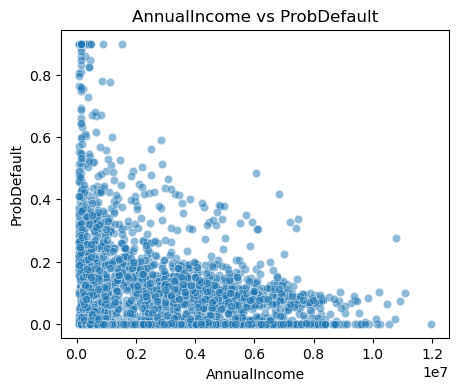

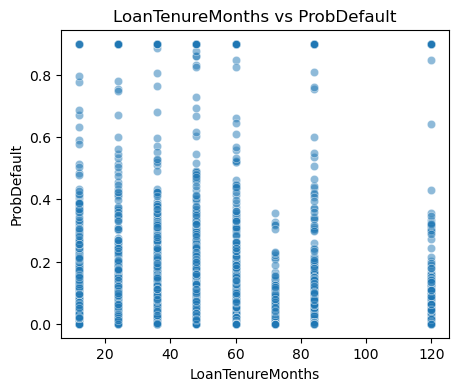

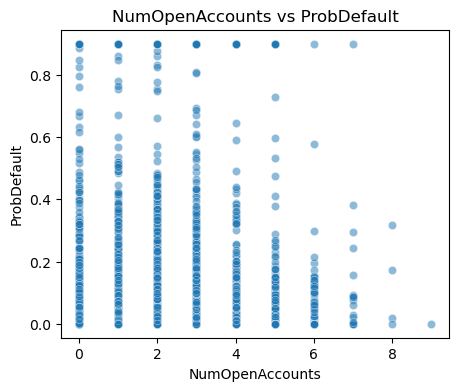

In [28]:
key_features = [
    "CreditScore", "LoanAmount", "InterestRate",
    "AnnualIncome", "LoanTenureMonths", "NumOpenAccounts"
]

for col in key_features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(data=data, x=col, y="ProbDefault", alpha=0.5)
    plt.title(f"{col} vs ProbDefault")
    plt.show()